In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Set a plot style
plt.style.use('seaborn-v0_8-darkgrid')
# Increase default figure size
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Define the data file path
DATA_FILE = "honeyproduction.csv"

# Load the dataset
try:
    df = pd.read_csv(DATA_FILE)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {DATA_FILE}")
    # Stop execution or handle error
    df = None

# Display the first few rows if data loaded
if df is not None:
    print("First 5 rows of the dataset:")
    display(df.head())

    print("\nBasic information about the dataset:")
    df.info()

    print("\nSummary statistics:")
    display(df.describe())

Data loaded successfully.
First 5 rows of the dataset:


,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998



Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB

Summary statistics:


,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


In [3]:
# Group by year and calculate the mean of total production
prod_per_year = df.groupby('year')['totalprod'].mean().reset_index() # reset_index makes 'year' a column again

print("Average total honey production per year:")
display(prod_per_year.head())

# Prepare data for scikit-learn
# X: Features (Year)
# y: Target (Average Total Production) 
X_train = prod_per_year[['year']]
y_train = prod_per_year['totalprod']

Average total honey production per year:


,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06


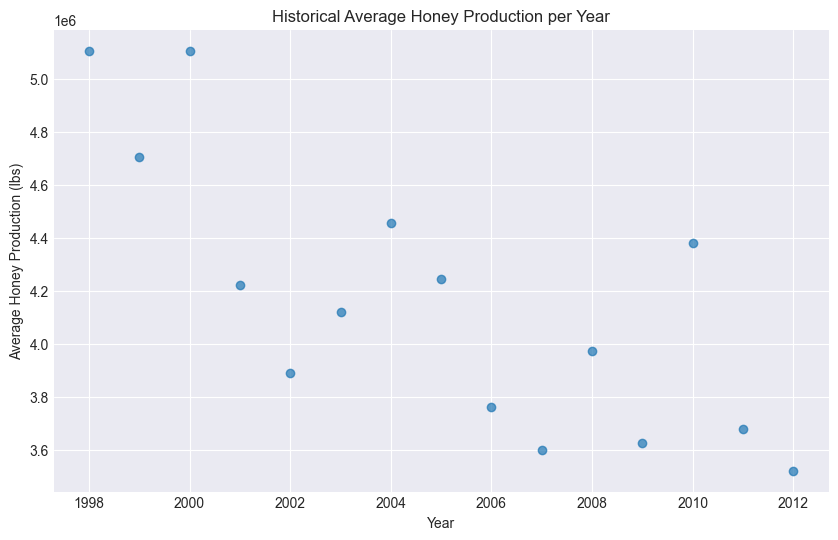

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Average Honey Production (lbs)')
plt.title('Historical Average Honey Production per Year')
plt.grid(True)
plt.show()

In [5]:
# Create and train the linear regression model
regr = LinearRegression()
regr.fit(X_train, y_train)

# Print the model parameters
slope = regr.coef_[0]
intercept = regr.intercept_

print("--- Linear Regression Model ---")
print(f"Slope (Coefficient): {slope:.2f} lbs/year")
print(f"Intercept: {intercept:,.2f} lbs")

--- Linear Regression Model ---
Slope (Coefficient): -88303.19 lbs/year
Intercept: 181,208,083.11 lbs


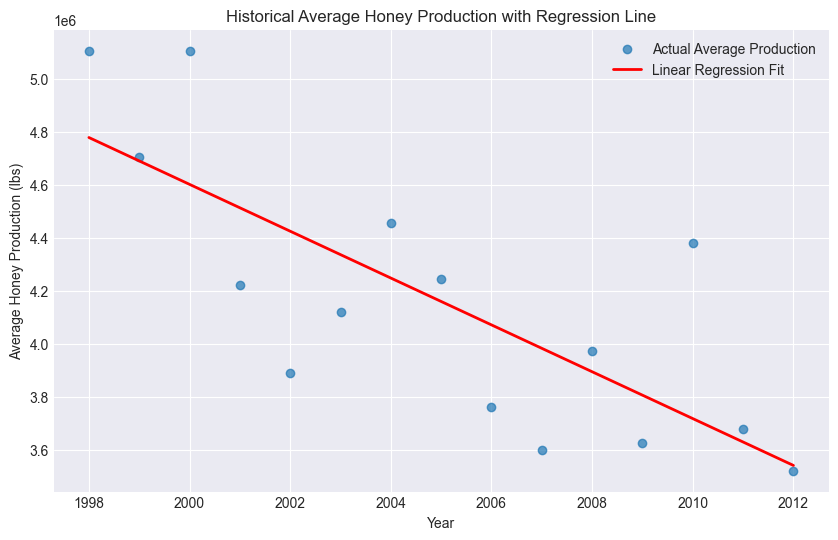

In [6]:
# Predict on the training data to see the regression line
y_predict_hist = regr.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.7, label='Actual Average Production')
plt.plot(X_train, y_predict_hist, color='red', linewidth=2, label='Linear Regression Fit')
plt.xlabel('Year')
plt.ylabel('Average Honey Production (lbs)')
plt.title('Historical Average Honey Production with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Define future years for prediction
PREDICTION_START_YEAR = 2013
PREDICTION_END_YEAR = 2050

# Create the array of future years
years_future = np.arange(PREDICTION_START_YEAR, PREDICTION_END_YEAR + 1).reshape(-1, 1)
X_future = pd.DataFrame(years_future, columns=['year'])

# Predict future production
future_predict = regr.predict(X_future)

print(f"\n--- Future Production Prediction ({PREDICTION_START_YEAR}-{PREDICTION_END_YEAR}) ---")
# Display a few predicted values
future_predictions_df = pd.DataFrame({'Year': years_future.flatten(), 'Predicted Production (lbs)': future_predict})
print("Sample Future Predictions:")
display(future_predictions_df.head())
print("...")
display(future_predictions_df.tail())


--- Future Production Prediction (2013-2050) ---
Sample Future Predictions:


,Year,Predicted Production (lbs)
0,2013,3.453763e+06
1,2014,3.365460e+06
2,2015,3.277157e+06
3,2016,3.188854e+06
4,2017,3.100551e+06


...


,Year,Predicted Production (lbs)
33,2046,539758.101556
34,2047,451454.912404
35,2048,363151.723252
36,2049,274848.534099
37,2050,186545.344947


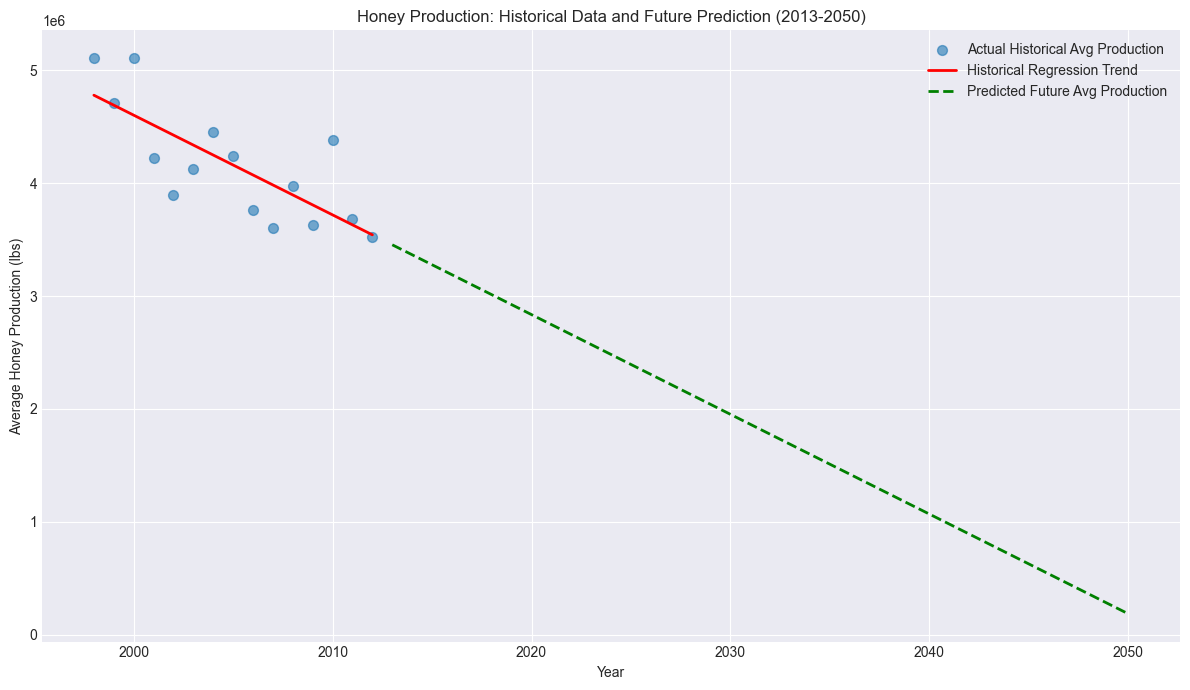

In [8]:
plt.figure(figsize=(12, 7))

# Plot historical actual data
plt.scatter(X_train, y_train, label='Actual Historical Avg Production', alpha=0.6, s=50)

# Plot historical regression line
plt.plot(X_train, y_predict_hist, color='red', linewidth=2, label='Historical Regression Trend')

# Plot future prediction line
plt.plot(X_future, future_predict, color='green', linestyle='--', linewidth=2, label='Predicted Future Avg Production')

plt.xlabel('Year')
plt.ylabel('Average Honey Production (lbs)')
plt.title(f'Honey Production: Historical Data and Future Prediction ({PREDICTION_START_YEAR}-{PREDICTION_END_YEAR})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()